In [60]:
import zipfile
import os
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [10]:
# arc_zip = '/workspaces/MLOPS/ARC2024/arc-prize-2024.zip'
# zip_ref = zipfile.ZipFile(arc_zip, 'r')
# zip_ref.extractall('./arc_data/')

In [32]:
training_inputs_path = '/workspaces/MLOPS/ARC2024/arc_data/arc-agi_training_challenges.json'
training_outputs_path = '/workspaces/MLOPS/ARC2024/arc_data/arc-agi_training_solutions.json'
evaluation_inputs_path = '/workspaces/MLOPS/ARC2024/arc_data/arc-agi_evaluation_challenges.json'
evaluation_outputs_path = '/workspaces/MLOPS/ARC2024/arc_data/arc-agi_evaluation_solutions.json'
test_inputs_path = '/workspaces/MLOPS/ARC2024/arc_data/arc-agi_test_challenges.json'

In [34]:
training_input = json.load(open(training_inputs_path, 'r'))
training_output = json.load(open(training_outputs_path, 'r'))


In [51]:
training_ids = list(training_input.keys()) #train inputs and outputs have same ids. 400 ids


In [61]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin=0, vmax=9)
color_list = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=200)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in = np.array(t["input"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()  

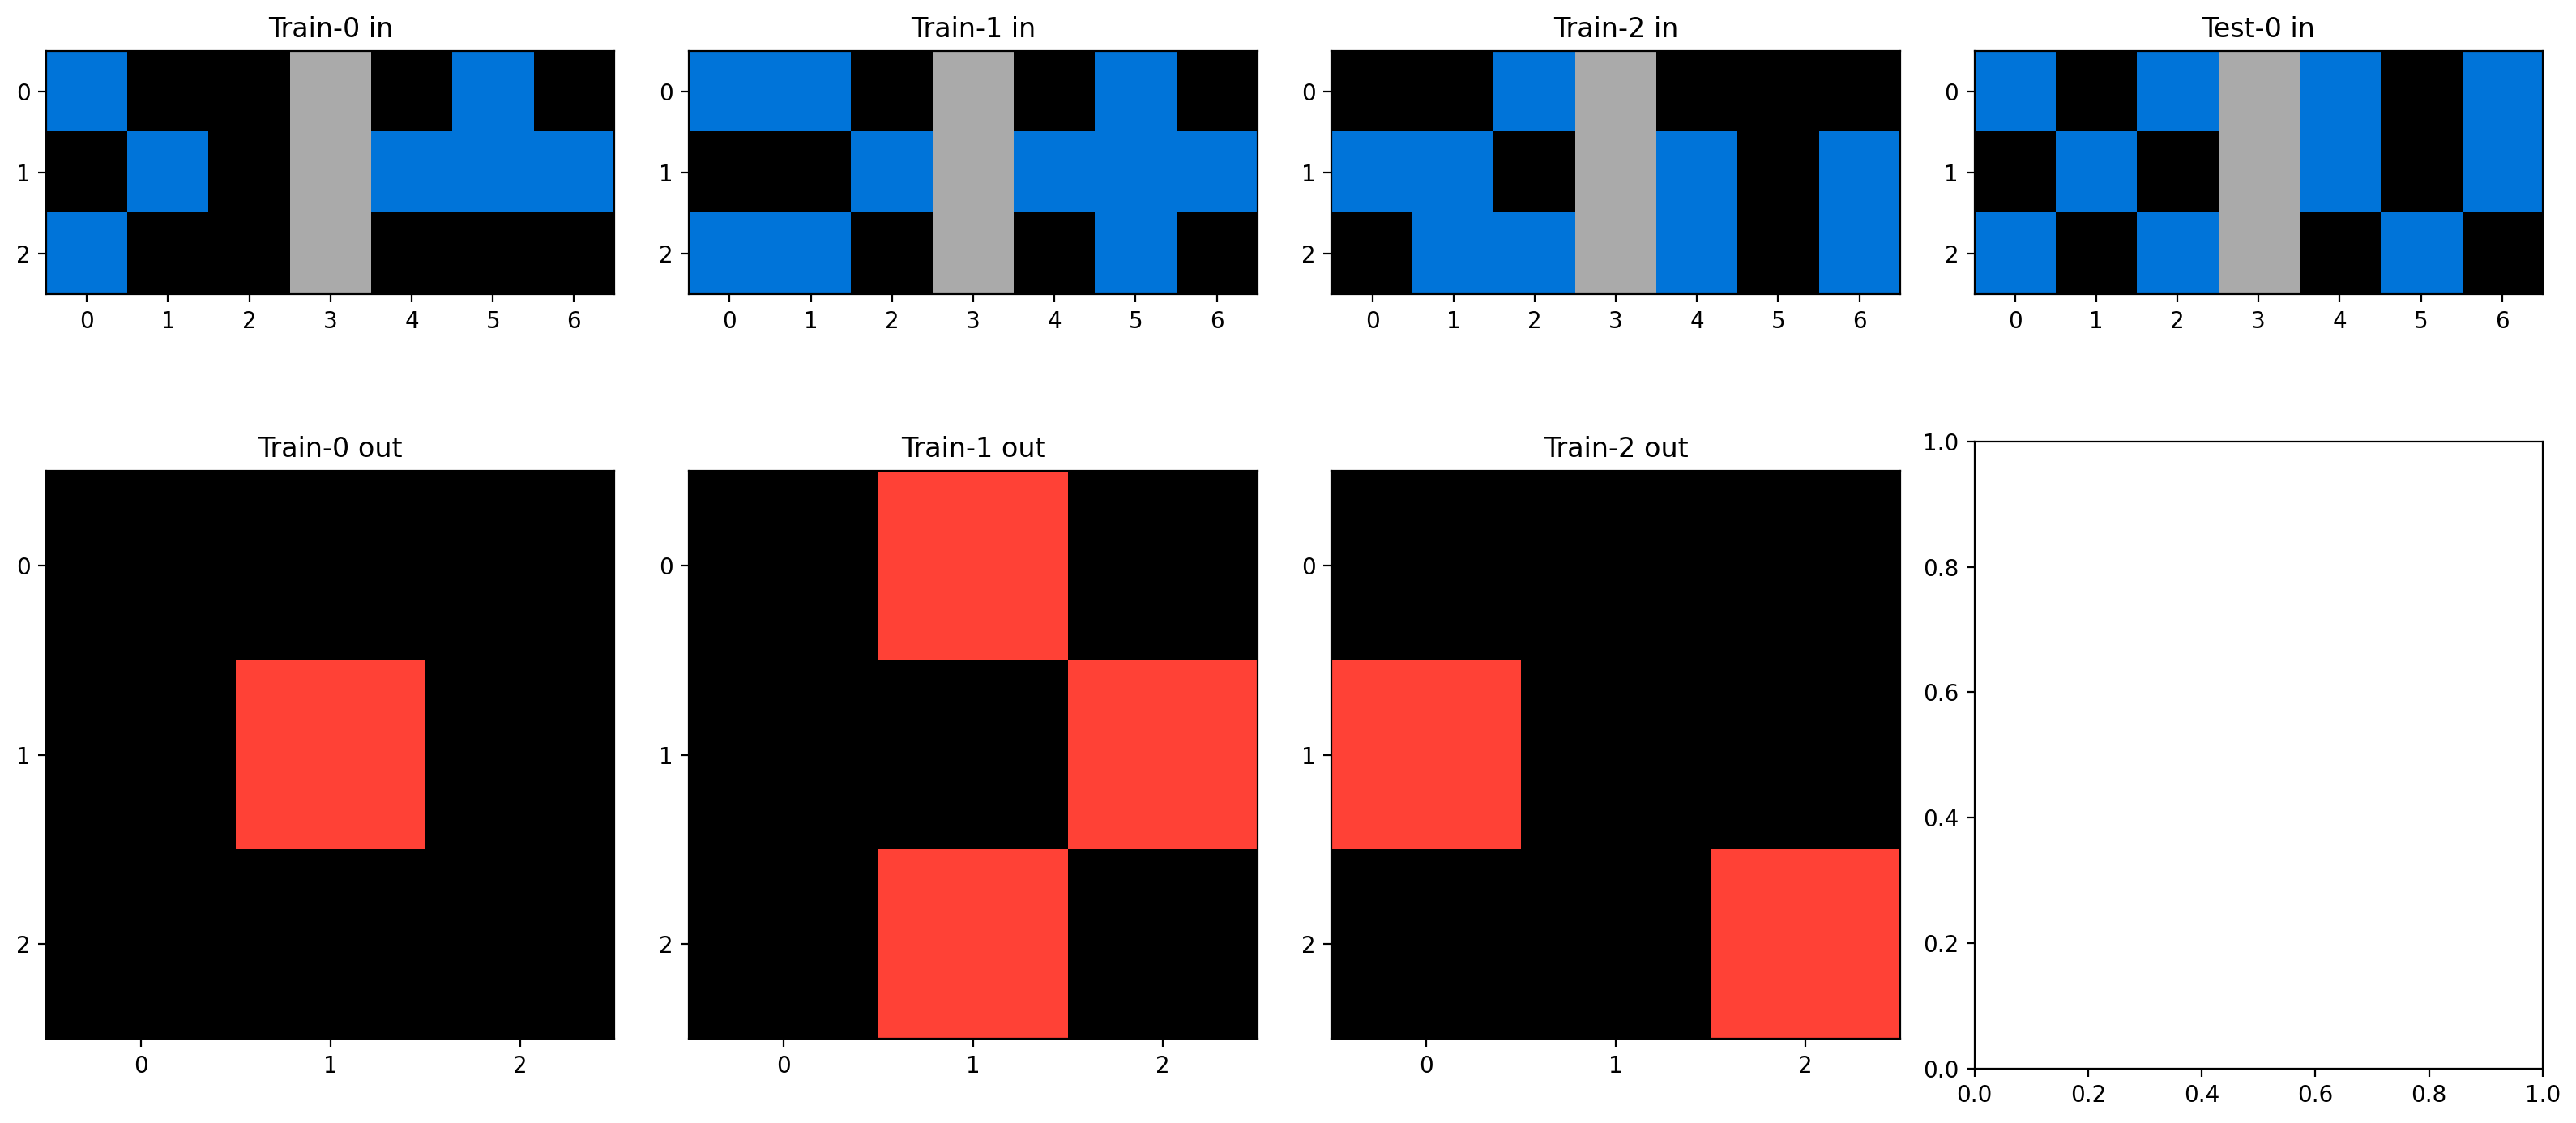

In [64]:
plot_task(training_input[training_ids[5]])